In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [4]:
df=pd.read_csv("data/diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)

In [9]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [10]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


## CART


### CART Model ve Tahmin


In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [13]:
cart_model = DecisionTreeClassifier().fit(X_train,y_train)

In [14]:
cart_model

DecisionTreeClassifier()

In [15]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7012987012987013

### CART Model Tuning
 

In [81]:
cart = DecisionTreeClassifier()

In [87]:
cart_params = {"max_depth":[1,3,5,8,10],
              "min_samples_split":[2,3,5,10,20]}

In [88]:
cart_cv_model = GridSearchCV(cart,cart_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.7s finished


In [89]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 20}

In [90]:
cart_tuned = DecisionTreeClassifier(max_depth=5,min_samples_split=20).fit(X_train,y_train)

In [91]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

## Random Forests


### Random Forests Model ve Tahmin


In [92]:
rf_model = RandomForestClassifier().fit(X_train,y_train)

In [93]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7359307359307359

### Random Forests Model Tuning


In [95]:
rf = RandomForestClassifier()

In [97]:
rf_params = {"n_estimators":[100,500,1000],
            "max_features":[3,5,8],
            "min_samples_split":[2,5,10]}

In [98]:
rf_cv_model = GridSearchCV(rf,rf_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  2.9min finished


In [99]:
rf_cv_model.best_params_

{'max_features': 8, 'min_samples_split': 5, 'n_estimators': 100}

In [101]:
rf_tuned = RandomForestClassifier(n_estimators=500,max_features=8,min_samples_split=5).fit(X_train,y_train)

In [102]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7445887445887446

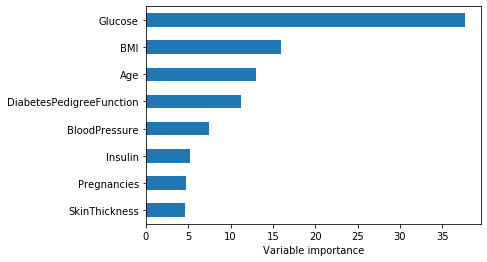

In [106]:
#değişken önem düzeyleri

Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},index=X_train.columns)
Importance.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh");
plt.xlabel("Variable importance")
plt.gca().legend_=None

## Gradient Boosting Machines (GBM)


### Gradient Boosting Machines Model ve Tahmin


In [107]:
gbm_model = GradientBoostingClassifier().fit(X_train,y_train)

In [108]:
gbm_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [109]:
?gbm_model

Type:        GradientBoostingClassifier
String form:
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
           <...>                  validation_fraction=0.1, verbose=0,
           warm_start=False)
Length:      100
File:        c:\users\feyza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'deviance', 'exponential'}, optional (default='deviance')
    loss function to be optimized. 'deviance' refers to
    deviance (= logistic regression) for classification
    

In [110]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7489177489177489

### Gradient Boosting Machines Model Tuning


In [111]:
gbm = GradientBoostingClassifier()

In [112]:
gbm_params = {"learning_rate":[0.1,0.01,0.001,0.05],
             "n_estimators":[100,500,1000],
             "max_depth":[2,5,8]}

In [113]:
gbm_cv_model = GridSearchCV(gbm,gbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  3.2min finished


In [117]:
gbm_cv_model.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}

In [118]:
gbm_tuned=GradientBoostingClassifier(learning_rate=0.01,n_estimators=500,max_depth=5).fit(X_train,y_train)

In [119]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7316017316017316

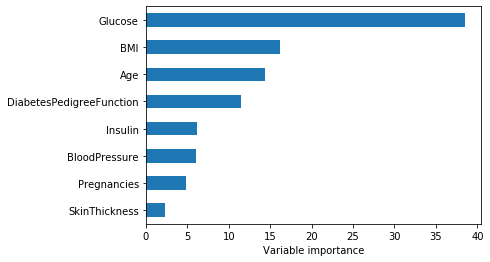

In [120]:
#değişken önem düzeyleri

Importance = pd.DataFrame({"Importance":gbm_tuned.feature_importances_*100},index=X_train.columns)
Importance.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh");
plt.xlabel("Variable importance")
plt.gca().legend_=None

## XGBoost

### XGBoost Model ve Tahmin


In [121]:
!pip install xgboost

In [122]:
from xgboost import XGBClassifier

In [123]:
xgb_model = XGBClassifier().fit(X_train,y_train)

In [124]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [125]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7359307359307359

### XGBoost Model Tuning


In [126]:
xgb = XGBClassifier()

In [127]:
xgb_params = {"n_estimators":[100,500,1000],
             "subsample":[0.6,0.8,1],
             "max_depth":[3,5,8],
             "learning_rate":[0.1,0.01,0.001]}

In [128]:
xgb_cv_model = GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 385 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 692 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  1.9min finished


In [129]:
xgb_cv_model.best_params_

{'learning_rate': 0.001, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}

In [130]:
xgb_tuned = XGBClassifier(n_estimators=500,subsample=0.6,max_depth=8,learning_rate=0.001).fit(X_train,y_train)

In [131]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7575757575757576

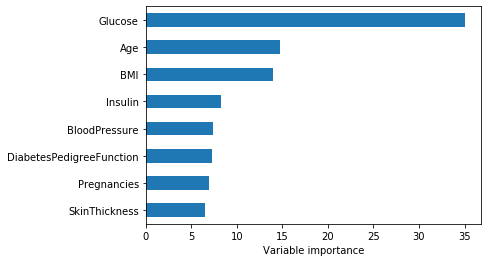

In [132]:
#değişken önem düzeyleri

Importance = pd.DataFrame({"Importance":xgb_tuned.feature_importances_*100},index=X_train.columns)
Importance.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh");
plt.xlabel("Variable importance")
plt.gca().legend_=None

## Light GBM


### Light GBM Model ve Tahmin


In [135]:
from lightgbm import LGBMClassifier

In [136]:
lgbm_model = LGBMClassifier().fit(X_train,y_train)

In [137]:
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [138]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7229437229437229

### Light GBM Model Tuning


In [139]:
lgbm = LGBMClassifier()

In [140]:
lgbm_params = {"learning_rate":[0.1,0.01,0.001],
              "n_estimators":[100,200,500],
              "max_depth":[1,2,35,8]}

In [141]:
lgbm_cv_model = GridSearchCV(lgbm,lgbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   19.5s finished


In [142]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

In [143]:
lgbm_tuned = LGBMClassifier(learning_rate= 0.01, max_depth= 1, n_estimators= 500).fit(X_train,y_train)

In [144]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7575757575757576

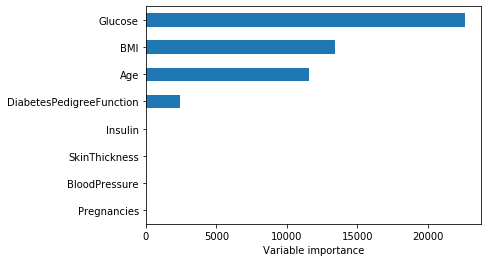

In [145]:
#değişken önem düzeyleri

Importance = pd.DataFrame({"Importance":lgbm_tuned.feature_importances_*100},index=X_train.columns)
Importance.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh");
plt.xlabel("Variable importance")
plt.gca().legend_=None

## CatBoost 

### CatBoost Model ve Tahmin


In [146]:
!pip install catboost

In [147]:
from catboost import CatBoostClassifier

In [148]:
catb_model = CatBoostClassifier().fit(X_train,y_train,verbose=False)

In [151]:
?catb_model

Type:            CatBoostClassifier
String form:     <catboost.core.CatBoostClassifier object at 0x0000025DCB385FC8>
File:            c:\users\feyza\anaconda3\lib\site-packages\catboost\core.py
Docstring:       <no docstring>
Class docstring: CatBoost model. Contains training, prediction and evaluation methods.
Init docstring: 
Initialize the CatBoost.

Parameters
----------
params : dict
    Parameters for CatBoost.
    If  None, all params are set to their defaults.
    If  dict, overriding parameters present in dict.


In [149]:
y_pred = catb_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7402597402597403

### CatBoost Model Tuning


In [152]:
catb = CatBoostClassifier()

In [153]:
catb_params = {"iterations":[200,500,1000],
              "learning_rate":[0.1,0.3,0.01],
              "depth":[4,6,8]}

In [155]:
catb_cv_model = GridSearchCV(catb,catb_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  7.2min finished


0:	learn: 0.6863412	total: 7.36ms	remaining: 1.47s
1:	learn: 0.6811322	total: 12.1ms	remaining: 1.2s
2:	learn: 0.6753199	total: 18ms	remaining: 1.18s
3:	learn: 0.6697717	total: 22.9ms	remaining: 1.12s
4:	learn: 0.6642090	total: 28.3ms	remaining: 1.1s
5:	learn: 0.6577038	total: 35.5ms	remaining: 1.15s
6:	learn: 0.6522290	total: 41.7ms	remaining: 1.15s
7:	learn: 0.6466015	total: 48.4ms	remaining: 1.16s
8:	learn: 0.6408068	total: 54.3ms	remaining: 1.15s
9:	learn: 0.6358218	total: 60ms	remaining: 1.14s
10:	learn: 0.6300444	total: 67.1ms	remaining: 1.15s
11:	learn: 0.6240992	total: 73.9ms	remaining: 1.16s
12:	learn: 0.6196618	total: 81.3ms	remaining: 1.17s
13:	learn: 0.6149237	total: 87.8ms	remaining: 1.17s
14:	learn: 0.6093146	total: 95.4ms	remaining: 1.18s
15:	learn: 0.6047282	total: 100ms	remaining: 1.15s
16:	learn: 0.6013242	total: 105ms	remaining: 1.13s
17:	learn: 0.5958624	total: 111ms	remaining: 1.13s
18:	learn: 0.5903733	total: 116ms	remaining: 1.11s
19:	learn: 0.5866505	total: 121m

In [156]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [157]:
catb_tuned = CatBoostClassifier(depth=8,iterations=200,learning_rate=0.03).fit(X_train,y_train)

0:	learn: 0.6730562	total: 5.14ms	remaining: 1.02s
1:	learn: 0.6583303	total: 9.9ms	remaining: 980ms
2:	learn: 0.6413852	total: 14.8ms	remaining: 972ms
3:	learn: 0.6268405	total: 19.6ms	remaining: 960ms
4:	learn: 0.6150883	total: 24.5ms	remaining: 954ms
5:	learn: 0.5989093	total: 29.2ms	remaining: 944ms
6:	learn: 0.5861303	total: 34.1ms	remaining: 941ms
7:	learn: 0.5735117	total: 39.1ms	remaining: 939ms
8:	learn: 0.5616370	total: 43.9ms	remaining: 932ms
9:	learn: 0.5507706	total: 49ms	remaining: 931ms
10:	learn: 0.5388394	total: 54.1ms	remaining: 929ms
11:	learn: 0.5264516	total: 58.9ms	remaining: 922ms
12:	learn: 0.5191660	total: 63.9ms	remaining: 920ms
13:	learn: 0.5104459	total: 68.9ms	remaining: 916ms
14:	learn: 0.5017018	total: 73.7ms	remaining: 909ms
15:	learn: 0.4954928	total: 78.5ms	remaining: 902ms
16:	learn: 0.4896817	total: 83.2ms	remaining: 896ms
17:	learn: 0.4808546	total: 87.9ms	remaining: 889ms
18:	learn: 0.4724010	total: 92.7ms	remaining: 883ms
19:	learn: 0.4657244	tota

In [158]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7489177489177489

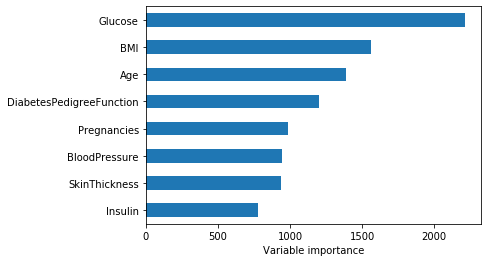

In [159]:
#değişken önem düzeyleri

Importance = pd.DataFrame({"Importance":catb_tuned.feature_importances_*100},index=X_train.columns)
Importance.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh");
plt.xlabel("Variable importance")
plt.gca().legend_=None